## Problem 1   
Consider a table with 3 columns and 1000 rows, some of whose entries are
missing. Denote by $A$ the set of rows with an entry in the first
column, $B$ the set of rows with an entry in the second column, and $C$
the set of rows with an entry in the third column. Use set notation
(intersections, unions, and complements) to represent the following sets
in terms of $A$, $B$, and $C$.

(i) The set of rows with no missing entries

(ii) The set of rows with all missing entries

(iii) The set of rows with at least one entry present

(iv) The set of rows with an entry in the first column and exactly one
    other entry
    
    




**Solution**.  
* A row has no missing entries if it's in $A$ and $B$ and
    $C$. Therefore, the answer is $A \cap B \cap C$. 
* Similarly, a row has all of its entries missing if it's in
    $A^\mathrm{c}$ and $B^\mathrm{c}$ and $C^\mathrm{c}$. So the answer is
    $A^\mathrm{c} \cap B^\mathrm{c} \cap C^\mathrm{c}$.
* At least one entry present means that it is \textit{not} the
    case that all of the entries are missing, so $(A^\mathrm{c} \cap
    B^\mathrm{c} \cap C^\mathrm{c})^\mathrm{c}$ is the right set. 
* To satisfy this condition a row must be in $A$ and either in
    $B \cap C^\mathrm{c}$ or $B^\mathrm{c} \cap C$. So the answer is
    $$
      A \cap ((B \cap C^\mathrm{c}) \cup (B^\mathrm{c} \cap C)). 
    $$

## Problem 2 

Each of 68 people is interviewed and scored on a scale from 0 to 10
  in three different categories. A composite score is obtained for
  each person by averaging the person's category scores. These data
  are arranged into a $68 \times 4$ matrix $X$, so that each row consists
  of a particular interviewee's category scores and composite score.   
Find the determinant of $X' X$. 



**Solution**.  
The rank of $X$ is at most 3, since the fourth column is in the span
  of the first three columns. Therefore, the rank of $X'X$ (which is
  always the same as the rank of $X$), is at most 3. Since $X'X$ is a
  $4\times 4$ matrix, this means that it is not full rank. The
  determinant of a rank deficient square matrix is 0, so the
  determinant of $X'X$ is zero. 

## Problem 3

(a) Does there exist a linearly dependent list of 10 vectors with the property that every sublist of length 9 is linearly independent?

(b) Does there exist a linearly dependent list of 10 vectors with the property that there are exactly 21 ways to remove two vectors from the list to obtain a linearly independent list?



**Solution**.  

(a) Yes. Consider a set of ten vectors in which the first nine are linearly indpendent vectors, and the tenth is the sum of the previous nine vectors. This set satisfies the desired property.  
(b) Consider a set of ten vectors in which the first eight are linearly independent vectors, the ninth is a sum of the first two vectors, and the tenth a sum of the remaining 8 initial independent vectors. This set satisfies the desired property, for in order to get a linearly independent set we have to choose either the first, the second, and the ninth, and we must choose one from the remaining vectors.  Since there are 7 ways to choose the vector to remove from the latter set and 3 ways to choose which vector to remove from the first set, there are $7 \times 3 = 21$ ways to remove two vectors from the original set to end up with a linearly independent list.  
(For part (b), we arrive at this conclusion mostly through observing the fact that 21 has prime factors 3 and 7, which add up to 10, and we need at least 8 linearly independent vectors. It seems not an unnatural thought to proceed with a linearly dependent vector set of three and another set of seven; an easy approach is to start with 8 linearly independent vectors, pick 2 independent vectors, and add a third linearly dependent on these two; then pick the remaining 6 independent vectors and add a vector in the span of these two.)

## Problem 4

A **pangram** is a sentence which contains every letter (they are useful for demonstrating fonts). *The quick brown fox jumps over the lazy dog* is a famous example of a pangram. 

Write a Julia function to check whether a given string is a pangram. 

Hint: you can get the alphabet as a `Set` by doing `Set('a':'z')`. Also, note the characters (single quotes) and strings (double quotes) are different in Julia. 



**Solution**.  Here's a short solution: 

In [1]:

ispangram(s) = Set('a':'z') ⊆ Set(lowercase(s))

using Test
@test ispangram("the quick brown fox jumps over the lazy dog")
@test ispangram("the quick brown fox jumped over the lazy dog") == false

Test Passed

## Problem 5

In the game of Set, every card has four features:

**Number**. 1, 2, or 3  
**Color**. purple, red, or green  
**Shape**. oval, squiggle, or diamond  
**Shading**. striped, solid, or outline

![set](set.png)

There is exactly one card for every possible combination of attributes (for example there's exactly one card with 2 red solid squiggles), so there are 81 cards in total. 

Three cards are said to form a set if for each feature, the three cards are either all the same or all different. For example, the cards shown above form a set because their shapes are all different, their shading is all different, the numbers are all different, and the colors are all different. 

The cards are shuffled, and 12 cards are dealt face up for all players to see. If any three of the cards forms a set, then the first player to identify a set gets to pick up those cards, and the cards are replaced from the deck. If no sets are present, then three additional cards are dealt. If a set is identified at 15 cards, then the three removed cards are not replaced, and the count goes back down to 12. If no sets are present even at 15 cards, then three more cards are dealt to get up to 18, and so on. The game ends when the deck is empty and there are no more sets. 

Write a program to simulate this game, play it 10,000 times, and find the proportion of games in which 18 cards appear at some point.

**Hints:**

(1) You can represent cards either as 4-tuples of `Int`s (like (1, 2, 1, 1)) or as a new type.  
(2) It's going to be important to break your program up into small, dedicated functions. For example, you can write a function for returning the 81 total cards, a function for shuffling the deck, a function which takes three cards and returns true or false depending on whether they form a set, a function for dealing cards, a function for finding all the sets on the board, a function which takes a single turn by randomly selecting one of the available sets or adding three cards to the board if there are no sets, and finally a function which puts those functions together to play the game.  
(3) Some Julia tips: 
  - `randperm` generates random permutations, and you can index an array with the resulting list to shuffle it. 
  - `vcat` concatenates two arrays.
  - You probably want to use a four-dimensional array comprehension to generate the list of all cards, and you can index it with a colon to flatten it.
  - To remove elements at positions `i`, `j`, and `k` from an array `A`, you can do `A[setdiff(1:end, (i,j,k))]`
  - You can start with an empty array and grow it one element at a time inside a loop using this pattern:
    ```julia 
    A = []
    for x in 1:10
        push!(A, x)
    end
    ```
  - You can use nested `for` loops to check all the triples to look for a set. There are more efficient algorithms, but that's OK.

In [2]:
using Random


In [3]:
struct Card
    number::Int
    color::Int
    shape::Int
    shading::Int
end

"""
Return a list of all 81 cards
"""
function all_cards()
    [Card(a,b,c,d) for a=1:3,b=1:3,c=1:3,d=1:3][:]
end

"""
Check whether three cards form a set
"""
function is_set(cards)
    if length(Set([cards[1].number, cards[2].number, cards[3].number])) == 2
        false
    elseif length(Set([cards[1].color, cards[2].color, cards[3].color])) == 2
        false
    elseif length(Set([cards[1].shape, cards[2].shape, cards[3].shape])) == 2
        false
    elseif length(Set([cards[1].shading, cards[2].shading, cards[3].shading])) == 2
        false    
    else
        true
    end
end

"""
Pull `n` cards from the deck and add them to the board
"""
function deal_cards(board, deck, n)
    vcat(board,deck[1:n]), deck[n+1:end]
end

"""
Deal the initial board
"""
function initial_board(deck)
    deal_cards(Card[], deck, 12)
end

"""
Loop through all triples of cards on the board and 
identify all sets.
"""
function all_sets(board)
    matches = []
    for i in 1:length(board)
        for j in i+1:length(board)
            for k in j+1:length(board)
                if is_set([board[i],board[j],board[k]])
                    matchindices = fill(true, length(board))
                    for idx in (i,j,k)
                        matchindices[idx] = false
                    end
                    push!(matches, matchindices)
                end
            end
        end
    end
    matches
end


"""
Perform one turn of the game: extract a random set if one is 
present, or deal three additional cards if not. 
"""
function one_turn(board, deck)
    matches = all_sets(board)
    if isempty(matches)
        vcat(board, deck[1:3]), deck[4:end]
    else
        match = rand(matches)
        if length(board) == 12
            vcat(board[match], deck[1:3]), deck[4:end]
        else
            board[match], deck
        end
    end
end


"""
Deal an initial deck and play out all turns of a game.
"""
function play_game()
    deck = shuffle(all_cards())
    board, deck = initial_board(deck)
    board_sizes = []
    while length(deck) > 0
        board, deck = one_turn(board, deck)
        push!(board_sizes, length(board))
    end
    board_sizes
end

play_game

In [4]:
# Check how many times 18 appears in a game, over 10,000 games:
sum([18 in play_game() for _ in 1:10_000])

155

## Problem 6   
Show that if $\{\mathbf{v}_1, \ldots, \mathbf{v}_n\}$ is linearly
independent and
$\{\mathbf{v}_1 + \mathbf{w}, \mathbf{v}_2 \ldots, \mathbf{v}_n\}$ is
linearly dependent, then $\mathbf{w}$ is in the span of
$\{\mathbf{v}_1, \ldots, \mathbf{v}_n\}$.



**Solution**.  If
  $\{\mathbf{v}_1 + \mathbf{w}, \mathbf{v}_2 \ldots, \mathbf{v}_n\}$
  is linearly dependent, then there exists a nontrivial linear
  combination of these vectors which is equal to the zero vector, say
  $$
    c_1(\mathbf{v}_1 + \mathbf{w}) + c_2 \mathbf{v}_2 + \cdots + c_n
    \mathbf{v}_n = \boldsymbol{0}. 
  $$
  If $c_1$ were zero in this equation, then there would be a
  nontrivial vanishing linear combination of the vectors
  $\mathbf{v}_2, \ldots, \mathbf{v}_n$, which isn't possible since we
  know those vectors are linearly independent. Therefore, we can solve
  for $\mathbf{w}$ to get
  $$
    \mathbf{w} = -\frac{c_1\mathbf{v}_1 + \cdots + c_n
      \mathbf{v}_n}{c_1}. 
  $$
  Therefore, $\mathbf{w}$ is in the span of
  $\{\mathbf{v}_1, \ldots, \mathbf{v}_n\}$. 

## Problem 7

Show that if $A$ is a symmetric matrix, then 
$$
A = \lambda_1 \mathbf{u}_1 \mathbf{u}_1' + \cdots + \lambda_1 \mathbf{u}_n \mathbf{u}_n'
$$
where $\mathbf{u}_1, \ldots, \mathbf{u}_n$ is a list of linearly independent unit eigenvectors of $A$ and $\lambda_1, \ldots, \lambda_n$ are the corresponding eigenvalues. Does this formula hold if $A$ is diagonalizable but not symmetric?

Hints: start with the orthogonal diagonalization of $A$ and use block multiplication.



**Solution**.  

A linear transformation is uniquely determined by where it sends each vector in a basis of its domain. Since $A$ and $\lambda_1 \mathbf{u}_1 \mathbf{u}_1' + \cdots + \lambda_1 \mathbf{u}_n \mathbf{u}_n'$ each map $\mathbf{u}_j$ to $\lambda_j \mathbf{u}_j$ for all $j$, and since the $\mathbf{u}_j$'s form a basis, $A$ and $\lambda_1 \mathbf{u}_1 \mathbf{u}_1' + \cdots + \lambda_1 \mathbf{u}_n \mathbf{u}_n'$ have to be equal. 

The equation does not hold in general if we drop the assumption that $A$ is symmetric. 

Note: this solution did not use the hint. 

In [5]:
A = [1 2; 3 4]
Λ, U = eigen(A)
sum(Λ[k]*U[:,k]*U[:,k]' for k=1:2)

2×2 Array{Float64,2}:
 0.676471  2.20588
 2.20588   4.32353

## Problem 8   
Use the result of the previous exercise to show that a quadratic function $f:\mathbb{R}^n \to \mathbb{R}$ has a local minimum at a critical point where the eigenvalues of the Hessian of $f$ are all positive.




**Solution**.  

We examine the quadratic approximation of $f$ at the critical point $a$:

$$f(\mathbf{x}) \approx f(\mathbf{a}) + (\mathbf{x}-\mathbf{a})*\nabla f(\mathbf{a}) + (\mathbf{x}-\mathbf{a})'H(\mathbf{a})(\mathbf{x}-\mathbf{a})$$

Since $\nabla f(\mathbf{a}) = 0$ at a critical point, the expression simplifies to 

$$f(\mathbf{x}) \approx f(\mathbf{a}) + (\mathbf{x}-\mathbf{a})'H(\mathbf{a})(\mathbf{x}-\mathbf{a})$$

where $(\mathbf{x}-a)'H(a)(\mathbf{x}-a)$ is the only nonconstant in the expression.

By Spectral Theorem, we can rewrite $(\mathbf{x}-\mathbf{a})'H(a)(\mathbf{x}-\mathbf{a})$ as 

$$
(c_1 \mathbf{u}_1 + \cdots + c_n \mathbf{u}_n)' (\lambda_1 \mathbf{u}_1 \mathbf{u}_1' + \cdots + \lambda_1 \mathbf{u}_n \mathbf{u}_n')(c_1 \mathbf{u}_1 + \cdots + c_n \mathbf{u}_n) = \lambda_1 c_1^2 + \cdots + \lambda_n c_n^2, 
$$

where $c_1 \mathbf{u}_1 + \cdots + c_n \mathbf{u}_n$ represents the arbitrary direction vector $\mathbf{x}-\mathbf{a}$ expanded in the basis of eigenvectors. We can see that this expression is nonnegative for all coefficients $c_1, \ldots, c_n$ (since the $\lambda$'s are all positive and the $c$'s are squared). Therefore, the function has a local minimum at the critical point.

## Problem 9
Suppose that $A = U \Sigma V'$ where $\Sigma$ is diagonal and $U$ and
$V$ are orthogonal matrices. Show that the columns of $U$ are
eigenvectors of $AA'$ and that the columns of $V$ are eigenvectors of
$A'A$.

Hint: substitute $A = U \Sigma V'$ into the expressions $AA'$ and $A'A$.



**Solution**. We have
  $$
    A A' = U \Sigma V'V \Sigma U' = U \Sigma^2 U'. 
  $$
  Multiplying on the right by $U$, we have that
  $$
    A A' U = U \Sigma^2. 
  $$
  The $j$th column on the left is the product of $AA'$ with the $j$th
  column of $U$, while the $j$th column on the right is $\sigma_j^2$
  times the $j$th column of $U$, where $\sigma_j$ is the $j$th
  diagonal entry of $\Sigma$. Therefore, the $j$th column of
  $\mathbf{u}$ is an eigenvector of $A$.

  Similarly, we have
  $$
    A'A = V \Sigma^2 V', 
  $$
  and the same argument shows that the columns of $V$ are all
  eigenvectors of $A'A$. 

## Problem 10 
The singular value decomposition can be used to identify the primary
axes in a ellipsoidal point cloud. Run the following block to generate
and plot a set of 100 points.

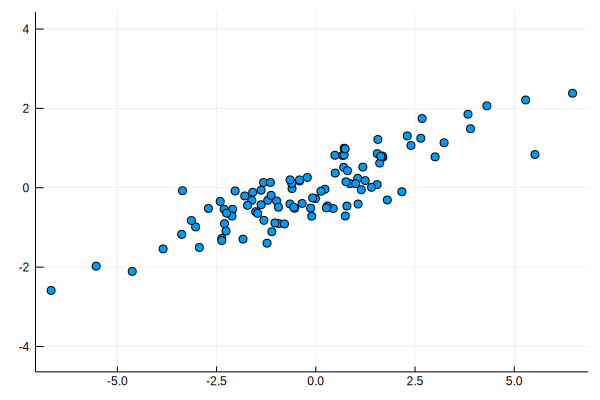

In [6]:
using LinearAlgebra 
using Plots 
using Random; Random.seed!(1234) # to make sure we get the same points
numpoints = 100 
T = [1 2; 0 1]
P = T * randn(2, numpoints)
scatter(P[1,:], P[2,:], aspect_ratio=:equal, legend=false)

Use Julia to compute the singular value decomposition $U \Sigma V'$ of
$P$, and show visually that the columns of $U$ run along the axes of the
ellipse that fits the point cloud (the one shown in the figure).

Hint: `plot!([(a,b),(c,d)])` adds a line segment from the point $(a,b)$ to the point $(c,d)$ to
the current plot. You’ll want to plot line segments representing both of
the columns of $V$.



The statement does check out:

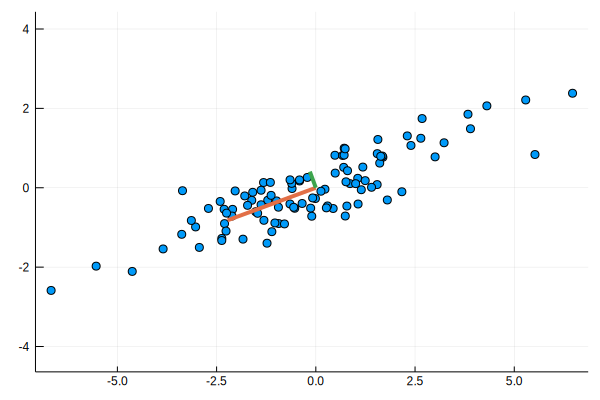

In [7]:
U, Σ, V = svd(P)
plot!([(0,0), (Σ[1]/sqrt(numpoints)*U[1,1],Σ[1]/sqrt(numpoints)*U[2,1])], linewidth = 4) 
plot!([(0,0), (Σ[2]/sqrt(numpoints)*U[1,2],Σ[2]/sqrt(numpoints)*U[2,2])], linewidth = 4)